In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
tx_data = pd.read_csv("input/digikala-orders.csv")

tx_data.head(10)

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0
5,11479246,2841640,312932,2018-03-01 12:07:15.000,290000.0,مشهد,1.0
6,8267421,5235886,42365,2017-08-19 13:30:24.000,55046.0,اصفهان,1.0
7,11588978,5574955,715680,2018-03-04 19:19:02.000,2790000.0,رشت,1.0
8,9916301,1145709,102588,2017-12-11 19:33:59.000,34862.0,تهران,1.0
9,10740652,4928230,658519,2018-01-23 06:11:34.000,2600000.0,خرمشهر,1.0


In [20]:
tx_data['Date'] = pd.to_datetime(tx_data['DateTime_CartFinalize'])  
tx_data['N_Date'] = tx_data['Date'].map(lambda date:f'{date.year*100 + date.month}')
tx_data['Date'] = tx_data['Date'].map(lambda date:f'{date.year}/{date.month}')

tx_data.head(5)

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,Date,N_Date
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0,2015/10,201510
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0,2018/2,201802
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0,2016/6,201606
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0,2018/9,201809
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0,2016/5,201605


In [21]:
monthly_data = tx_data.groupby(['Date', 'N_Date'])['ID_Order'].nunique().reset_index()
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])
monthly_datas = monthly_data.sort_values(by=['Date'])
monthly_datas['Date_2'] = monthly_datas['Date'].to_numpy(dtype=str)
monthly_datas['Date_2'] = monthly_datas['Date_2'].str.slice(0,7)
monthly_datas['N_Date'] = monthly_datas['N_Date'].to_numpy(dtype=int)
monthly_datas.head(5)

,Date,N_Date,ID_Order,Date_2
3,2013-09-01,201309,6,2013-09
0,2013-10-01,201310,73,2013-10
1,2013-11-01,201311,90,2013-11
2,2013-12-01,201312,116,2013-12
4,2014-01-01,201401,140,2014-01


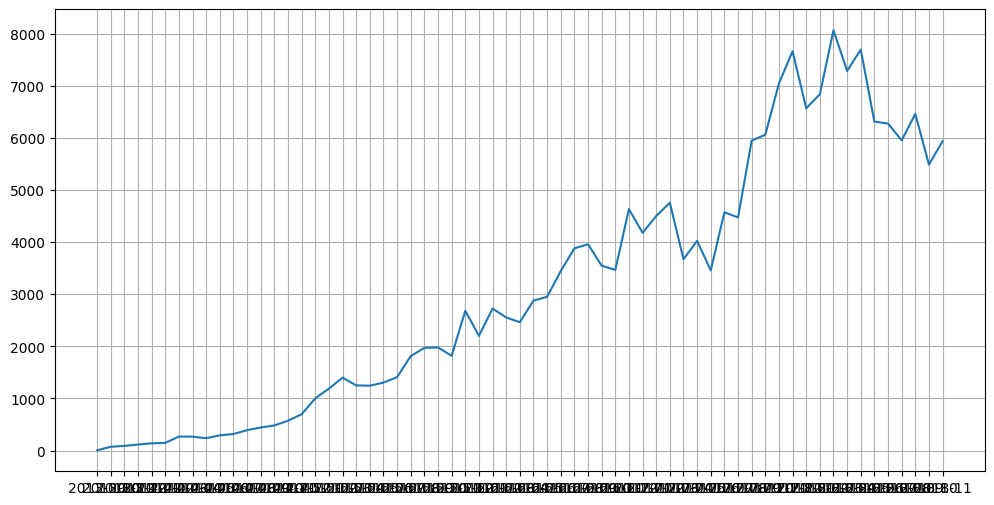

In [24]:
plt.figure(figsize=(12,6))
plt.plot(monthly_datas.query('N_Date < 201812')['Date_2'].to_numpy(dtype=str), 
         monthly_datas.query('N_Date < 201812')['ID_Order'].to_numpy())

plt.grid()
plt.show()